In [1]:
import IPython
import IPython.display
import numpy as np
import pandas as pd
import glob
import joblib  
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import imblearn
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.datasets import make_imbalance
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
import numpy as geek
from keras.models import load_model 

In [2]:
# !pip install h5py

In [3]:
df1 = pd.read_hdf('D:\Tesis\hdf\gaia\gaia_label_full_22_500.hdf')
yframes = pd.read_hdf('D:\Tesis\hdf\gaia\gaia_output_ful_22_500.hdf')
# df1 = pd.read_hdf('/content/drive/MyDrive/hdfdiff/gaia_label_full_22_500.hdf')
# yframes = pd.read_hdf('/content/drive/MyDrive/hdfdiff/gaia_output_ful_22_500.hdf')

In [4]:
# yframes = pd.read_hdf('/content/drive/MyDrive/Colab Notebooks/Data/gaia_output_full_diff.hdf')
df2 = pd.read_hdf('D:\Tesis\hdf\gaia\gaia_label_full_diff.hdf')
# df2 = pd.read_hdf('/content/drive/MyDrive/hdfdiff/gaia_label_full_diff.hdf')

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
print(df1)

                time        mag
0        1711.234429  19.595734
1        1711.308429  19.755899
2        1733.180046  19.918856
3        1733.356191  19.303412
4        1733.606337  19.871112
...              ...        ...
3886537  1897.958046  14.752536
3886538  1898.208233  15.127580
3886539  1898.458392  15.327697
3886540  1940.361672  15.240801
3886541  1978.841512  15.328986

[3886542 rows x 2 columns]


In [7]:
print(df2)

              time       mag
0         0.074000  0.160165
1        21.871617  0.162957
2         0.176146 -0.615444
3         0.250145  0.567700
4         0.250143 -0.426121
...            ...       ...
3886537   0.250186  0.375043
3886538   0.250159  0.200117
3886539  41.903280 -0.086895
3886540  38.479840  0.088185
3886541   0.074014 -0.219634

[3886542 rows x 2 columns]


In [8]:
df1.columns = ['Time','Mag']
df2.columns = ['diffTime','diffMag']

In [9]:
print(df2)

          diffTime   diffMag
0         0.074000  0.160165
1        21.871617  0.162957
2         0.176146 -0.615444
3         0.250145  0.567700
4         0.250143 -0.426121
...            ...       ...
3886537   0.250186  0.375043
3886538   0.250159  0.200117
3886539  41.903280 -0.086895
3886540  38.479840  0.088185
3886541   0.074014 -0.219634

[3886542 rows x 2 columns]


In [10]:
df = pd.concat([df1, df2], axis=1)

In [11]:
print(df)

                Time        Mag   diffTime   diffMag
0        1711.234429  19.595734   0.074000  0.160165
1        1711.308429  19.755899  21.871617  0.162957
2        1733.180046  19.918856   0.176146 -0.615444
3        1733.356191  19.303412   0.250145  0.567700
4        1733.606337  19.871112   0.250143 -0.426121
...              ...        ...        ...       ...
3886537  1897.958046  14.752536   0.250186  0.375043
3886538  1898.208233  15.127580   0.250159  0.200117
3886539  1898.458392  15.327697  41.903280 -0.086895
3886540  1940.361672  15.240801  38.479840  0.088185
3886541  1978.841512  15.328986   0.074014 -0.219634

[3886542 rows x 4 columns]


In [12]:
# df = df.drop(['diffMag'], axis = 1)

In [13]:
print(df)

                Time        Mag   diffTime   diffMag
0        1711.234429  19.595734   0.074000  0.160165
1        1711.308429  19.755899  21.871617  0.162957
2        1733.180046  19.918856   0.176146 -0.615444
3        1733.356191  19.303412   0.250145  0.567700
4        1733.606337  19.871112   0.250143 -0.426121
...              ...        ...        ...       ...
3886537  1897.958046  14.752536   0.250186  0.375043
3886538  1898.208233  15.127580   0.250159  0.200117
3886539  1898.458392  15.327697  41.903280 -0.086895
3886540  1940.361672  15.240801  38.479840  0.088185
3886541  1978.841512  15.328986   0.074014 -0.219634

[3886542 rows x 4 columns]


In [14]:
print(df.shape)

(3886542, 4)


In [15]:
print(yframes.shape)

(176661, 1)


In [16]:
sample_size = 22

In [17]:
df.head(sample_size+1)

,Time,Mag,diffTime,diffMag
0,1711.234429,19.595734,0.074000,0.160165
1,1711.308429,19.755899,21.871617,0.162957
2,1733.180046,19.918856,0.176146,-0.615444
3,1733.356191,19.303412,0.250145,0.567700
4,1733.606337,19.871112,0.250143,-0.426121
5,1733.856479,19.444991,5.002683,0.479983
6,1738.859162,19.924974,0.250144,-0.250726
7,1739.109307,19.674248,0.074001,0.184989
8,1739.183308,19.859238,0.176145,0.166251
9,1739.359453,20.025488,0.073974,-1.040372


In [18]:
# plt.plot(df.iloc[0:(sample_size-1), 0], df.iloc[0:(sample_size-1), 1])

In [19]:
df.iloc[sample_size-1]

Time        1914.613828
Mag           19.985012
diffTime       0.074013
diffMag       -0.747104
Name: 21, dtype: float64

In [20]:
#yframes lista de clase de salida
df_array = df.to_numpy()
array_flat = np.reshape(df_array,((int(len(df)/sample_size), sample_size, 4)))
#df_array.shape

column_indices = {name: i for i, name in enumerate(df.columns)}

#Tomamos el 10% de la data para test (0.1)
X_train_val, test_df, y_train_val, y_test_df = train_test_split(array_flat, yframes, test_size=0.1, random_state=42)
#Tomamos el 10% de la data para validación (0.11)
X_trainp, val_df, y_trainp, y_val_df = train_test_split(X_train_val, y_train_val, test_size=0.11, random_state=42)

#Generar training, 1-test_size = porcentaje
train_df, trash_x, y_train_df, trash_y = train_test_split(X_trainp, y_trainp, test_size=0.0001, random_state=42)

# X_train_val, test_df = train_test_split(array_flat, test_size=0.1, random_state=42)
# train_df, val_df = train_test_split(X_train_val, test_size=0.384, random_state=42)

print('train_df: ',train_df.shape)
print('y_train_df: ',y_train_df.shape)
print('val_df: ',val_df.shape)
print('test_df: ',test_df.shape)
print('trash_x',trash_x.shape)

train_df:  (141489, 22, 4)
y_train_df:  (141489, 1)
val_df:  (17490, 22, 4)
test_df:  (17667, 22, 4)
trash_x (15, 22, 4)


In [21]:
# y_train_df.head(50)

In [22]:
train_df = train_df.reshape(141489*22 , 4)

In [23]:
train_df.shape

(3112758, 4)

In [24]:
print(y_train_df)

        class
114208      2
47587       6
79697       2
23450       2
139558      2
...       ...
64021       0
36177       2
83246       2
31266       5
142285      3

[141489 rows x 1 columns]


In [25]:
y_train_df = y_train_df.to_numpy()

In [26]:
repetitions = 22
y_train_df = geek.repeat(y_train_df, repetitions) 

In [27]:
len(y_train_df)

3112758

In [28]:
train_df = pd.DataFrame(train_df)
y_train_df = pd.DataFrame(y_train_df)

In [29]:
train_df.columns = ['Time','Mag','diffTime','diffMag']
y_train_df.columns = ['Class']

In [30]:
print(y_train_df)

         Class
0            2
1            2
2            2
3            2
4            2
...        ...
3112753      3
3112754      3
3112755      3
3112756      3
3112757      3

[3112758 rows x 1 columns]


In [31]:
print(train_df)

                Time        Mag   diffTime   diffMag
0        1706.454215  13.316761   0.074029  0.005147
1        1706.528244  13.321909  34.301776 -0.162099
2        1740.830020  13.159809   0.074001 -0.006424
3        1740.904021  13.153386  94.859545  0.144594
4        1835.763566  13.297980   0.176166 -0.023104
...              ...        ...        ...       ...
3112753  2128.105280  17.604920   0.074001 -0.241334
3112754  2128.179281  17.363586  28.913071 -0.130828
3112755  2157.092352  17.232758  24.065341  0.216394
3112756  2181.157693  17.449152  95.371862  0.025411
3112757  2276.529556  17.474564   0.176138 -0.120981

[3112758 rows x 4 columns]


In [32]:
labels_gaia_train = pd.concat([train_df, y_train_df], axis=1)

In [33]:
print(labels_gaia_train)

                Time        Mag   diffTime   diffMag  Class
0        1706.454215  13.316761   0.074029  0.005147      2
1        1706.528244  13.321909  34.301776 -0.162099      2
2        1740.830020  13.159809   0.074001 -0.006424      2
3        1740.904021  13.153386  94.859545  0.144594      2
4        1835.763566  13.297980   0.176166 -0.023104      2
...              ...        ...        ...       ...    ...
3112753  2128.105280  17.604920   0.074001 -0.241334      3
3112754  2128.179281  17.363586  28.913071 -0.130828      3
3112755  2157.092352  17.232758  24.065341  0.216394      3
3112756  2181.157693  17.449152  95.371862  0.025411      3
3112757  2276.529556  17.474564   0.176138 -0.120981      3

[3112758 rows x 5 columns]


Class=2, n=1409540 (45.283%)
Class=6, n=20614 (0.662%)
Class=0, n=1176186 (37.786%)
Class=4, n=102784 (3.302%)
Class=1, n=323466 (10.392%)
Class=5, n=71302 (2.291%)
Class=3, n=8866 (0.285%)


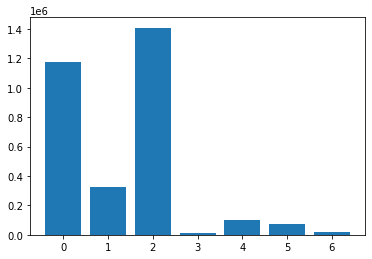

In [34]:
data = labels_gaia_train.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=2, n=1409540 (14.286%)
Class=6, n=1409540 (14.286%)
Class=0, n=1409540 (14.286%)
Class=4, n=1409540 (14.286%)
Class=1, n=1409540 (14.286%)
Class=5, n=1409540 (14.286%)
Class=3, n=1409540 (14.286%)


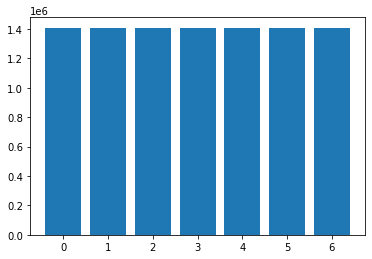

In [35]:
data = labels_gaia_train.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [36]:
print(data)

[[ 1.70645422e+03  1.33167615e+01  7.40289600e-02  5.14727000e-03
   2.00000000e+00]
 [ 1.70652824e+03  1.33219088e+01  3.43017757e+01 -1.62099280e-01
   2.00000000e+00]
 [ 1.74083002e+03  1.31598095e+01  7.40013800e-02 -6.42393000e-03
   2.00000000e+00]
 ...
 [ 2.15709235e+03  1.72327584e+01  2.40653413e+01  2.16393860e-01
   3.00000000e+00]
 [ 2.18115769e+03  1.74491523e+01  9.53718622e+01  2.54114800e-02
   3.00000000e+00]
 [ 2.27652956e+03  1.74745638e+01  1.76137810e-01 -1.20980770e-01
   3.00000000e+00]]


In [37]:
print(X, y)

[[ 1.70645422e+03  1.33167615e+01  7.40289600e-02  5.14727000e-03]
 [ 1.70652824e+03  1.33219088e+01  3.43017757e+01 -1.62099280e-01]
 [ 1.74083002e+03  1.31598095e+01  7.40013800e-02 -6.42393000e-03]
 ...
 [ 1.89762337e+03  1.23230362e+01  2.94153272e+01  2.18421684e-01]
 [ 2.17649951e+03  1.44022310e+01  3.85489359e+01  3.20866236e-01]
 [ 1.97845763e+03  1.13677356e+01  1.76165248e-01 -4.71421664e-02]] [2 2 2 ... 6 6 6]


In [38]:
print(y)

[2 2 2 ... 6 6 6]


In [39]:
train_df = X
y_train_df = y

In [40]:
print(train_df.shape)
print(y_train_df.shape)
print(val_df.shape)
print(test_df.shape)

(9866780, 4)
(9866780,)
(17490, 22, 4)
(17667, 22, 4)


In [41]:
#448490 = 9866780/22
train_df = np.asarray(train_df).reshape(448490,22,4)

In [42]:
y_train_df = pd.DataFrame(y_train_df)
y_val_df = pd.DataFrame(y_val_df)
y_test_df = pd.DataFrame(y_test_df)

In [43]:
train_df.shape

(448490, 22, 4)

In [44]:
y_train_df.shape

(9866780, 1)

In [45]:
print('train_df: ',train_df.shape)
print('y_train_df: ',y_train_df.shape)
print('val_df: ',val_df.shape)
print('y_val_df: ',y_val_df.shape)

train_df:  (448490, 22, 4)
y_train_df:  (9866780, 1)
val_df:  (17490, 22, 4)
y_val_df:  (17490, 1)


In [46]:
y_train_df= y_train_df[y_train_df.index % 22 == 0]

In [47]:
print('train_df: ',train_df.shape)
print('y_train_df: ',y_train_df.shape)
print('val_df: ',val_df.shape)
print('y_val_df: ',y_val_df.shape)

train_df:  (448490, 22, 4)
y_train_df:  (448490, 1)
val_df:  (17490, 22, 4)
y_val_df:  (17490, 1)


In [48]:
#Normalización de siempre
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [49]:
MAX_EPOCHS = 500
checkpoint_filepath = "D:\Tesis\LSTMGRUSMOTE\GaiaLSTMGRU(n,4)Train100\GaiaGruDIFFn4"

sgd = tf.keras.optimizers.SGD(learning_rate = 0.01)

def compile_and_fit(model, x, y, x_val,y_val, patience=50):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
#   print(x.shape)
#   print(y.shape)

  # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error',
  #                                                   patience=patience,
  #                                                   mode='min')
  
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

  model.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
                optimizer=sgd,
                metrics=['accuracy'])
  #print(model.summary())
  history = model.fit(x, y, epochs=MAX_EPOCHS,
                      validation_data=(x_val, y_val),
                      callbacks=[early_stopping, model_checkpoint_callback])
  return history

# LSTM

In [50]:
# lstm_model = tf.keras.models.Sequential([

#     # Shape [batch, time, features] => [batch, time, lstm_units]
#     tf.keras.layers.LSTM(128, return_sequences=True),
#     #tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.LSTM(64, return_sequences=True),
#     #tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.LSTM(16, return_sequences=False),
#     tf.keras.layers.Dense(units=7 , activation = 'softmax')
# ])

In [51]:
# loaded_model = load_model("D:\Tesis\GaiaLSTM(N,3)\lstm_model_diff_gaia_N3.h5") 
# loss, accuracy = loaded_model.evaluate(test_df, y_test_df)

In [52]:
# history = compile_and_fit(lstm_model, train_df, y_train_df, val_df, y_val_df)
# val_performance = {}
# performance = {}
# val_performance['LSTM'] = lstm_model.evaluate(val_df, y_val_df)
# performance['LSTM'] = lstm_model.evaluate(test_df, y_test_df, verbose=1)

In [53]:
# lstm_model.save("lstm_model_diff_gaia_N4.h5") 

In [54]:
# # history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)

# # Get training and test loss histories
# training_loss = history.history['accuracy']
# test_loss = history.history['val_accuracy']

# # Create count of the number of epochs
# epoch_count = range(1, len(training_loss) + 1)

# # Visualize loss history
# plt.plot(epoch_count, training_loss, 'r--')
# plt.plot(epoch_count, test_loss, 'b-')
# plt.legend(['Training accuracy', 'Test accuracy'])
# plt.xlabel('Epoch')
# plt.ylabel('accuracy')
# plt.show()

In [55]:
# MAX_EPOCHS = 500
# checkpoint_filepath = "D:\Tesis\grulstm\GaiagruDIFFn4"

# def compile_and_fit(model, x, y, x_val,y_val, patience=50):
#   early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                     patience=patience,
#                                                     mode='min')
# #   print(x.shape)
# #   print(y.shape)

#   # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error',
#   #                                                   patience=patience,
#   #                                                   mode='min')
  
#   model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

#   model.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
#                 optimizer=tf.optimizers.Adam(),
#                 metrics=['accuracy'])
#   #print(model.summary())
#   history = model.fit(x, y, epochs=MAX_EPOCHS,
#                       validation_data=(x_val, y_val),
#                       callbacks=[early_stopping, model_checkpoint_callback])
#   return history

# GRU

In [56]:
gru_model = tf.keras.models.Sequential([

    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.GRU(16, return_sequences=False),
    tf.keras.layers.Dense(units=7 , activation = 'softmax')
])

In [57]:
history = compile_and_fit(gru_model, train_df, y_train_df, val_df, y_val_df)
val_performance = {}
performance = {}
val_performance['GRU'] = gru_model.evaluate(val_df, y_val_df)
performance['GRU'] = gru_model.evaluate(test_df, y_test_df, verbose=1)

Epoch 1/500
14016/14016 [==============================] - 81s 6ms/step - loss: 1.7846 - accuracy: 0.2372 - val_loss: 1.3565 - val_accuracy: 0.4454
Epoch 2/500
14016/14016 [==============================] - 78s 6ms/step - loss: 1.5807 - accuracy: 0.3101 - val_loss: 1.2204 - val_accuracy: 0.4994
Epoch 3/500
14016/14016 [==============================] - 78s 6ms/step - loss: 1.5533 - accuracy: 0.3225 - val_loss: 1.2193 - val_accuracy: 0.4818
Epoch 4/500
14016/14016 [==============================] - 79s 6ms/step - loss: 1.5276 - accuracy: 0.3282 - val_loss: 1.1611 - val_accuracy: 0.4970
Epoch 5/500
14016/14016 [==============================] - 78s 6ms/step - loss: 1.5111 - accuracy: 0.3389 - val_loss: 1.1626 - val_accuracy: 0.5111
Epoch 6/500
14016/14016 [==============================] - 79s 6ms/step - loss: 1.4680 - accuracy: 0.3774 - val_loss: 1.1542 - val_accuracy: 0.5117
Epoch 7/500
14016/14016 [==============================] - 78s 6ms/step - loss: 1.4468 - accuracy: 0.3913 - val_

14016/14016 [==============================] - 78s 6ms/step - loss: 1.0522 - accuracy: 0.5994 - val_loss: 0.8453 - val_accuracy: 0.7087
Epoch 57/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.9252 - accuracy: 0.6536 - val_loss: 0.9244 - val_accuracy: 0.6541
Epoch 58/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.8834 - accuracy: 0.6711 - val_loss: 1.0600 - val_accuracy: 0.5892
Epoch 59/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.8540 - accuracy: 0.6835 - val_loss: 0.7023 - val_accuracy: 0.7734
Epoch 60/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.8213 - accuracy: 0.6972 - val_loss: 0.7742 - val_accuracy: 0.7491
Epoch 61/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.7899 - accuracy: 0.7112 - val_loss: 0.7585 - val_accuracy: 0.7365
Epoch 62/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.7388 - accuracy: 0.7333 - val_loss: 

Epoch 111/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2594 - accuracy: 0.9083 - val_loss: 0.2596 - val_accuracy: 0.9136
Epoch 112/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2581 - accuracy: 0.9088 - val_loss: 0.2742 - val_accuracy: 0.9018
Epoch 113/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2579 - accuracy: 0.9089 - val_loss: 0.2639 - val_accuracy: 0.9134
Epoch 114/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2525 - accuracy: 0.9107 - val_loss: 0.3763 - val_accuracy: 0.8663
Epoch 115/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2527 - accuracy: 0.9108 - val_loss: 0.2472 - val_accuracy: 0.9136
Epoch 116/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2508 - accuracy: 0.9117 - val_loss: 0.2736 - val_accuracy: 0.9065
Epoch 117/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2506 - accuracy:

14016/14016 [==============================] - 78s 6ms/step - loss: 0.2097 - accuracy: 0.9261 - val_loss: 0.1765 - val_accuracy: 0.9413
Epoch 166/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2055 - accuracy: 0.9278 - val_loss: 0.1789 - val_accuracy: 0.9425
Epoch 167/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2064 - accuracy: 0.9275 - val_loss: 0.1761 - val_accuracy: 0.9422
Epoch 168/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2062 - accuracy: 0.9276 - val_loss: 0.1781 - val_accuracy: 0.9421
Epoch 169/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2061 - accuracy: 0.9282 - val_loss: 0.1727 - val_accuracy: 0.9429
Epoch 170/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2038 - accuracy: 0.9283 - val_loss: 0.1750 - val_accuracy: 0.9431
Epoch 171/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.2041 - accuracy: 0.9282 - val_

Epoch 220/500
14016/14016 [==============================] - 79s 6ms/step - loss: 0.1869 - accuracy: 0.9343 - val_loss: 0.1602 - val_accuracy: 0.9477
Epoch 221/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1887 - accuracy: 0.9337 - val_loss: 0.1509 - val_accuracy: 0.9513
Epoch 222/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1906 - accuracy: 0.9332 - val_loss: 0.1535 - val_accuracy: 0.9498
Epoch 223/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1836 - accuracy: 0.9355 - val_loss: 0.1808 - val_accuracy: 0.9427
Epoch 224/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1857 - accuracy: 0.9343 - val_loss: 0.2269 - val_accuracy: 0.9256
Epoch 225/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1831 - accuracy: 0.9353 - val_loss: 0.1539 - val_accuracy: 0.9504
Epoch 226/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1840 - accuracy:

14016/14016 [==============================] - 78s 6ms/step - loss: 0.1721 - accuracy: 0.9396 - val_loss: 0.1458 - val_accuracy: 0.9530
Epoch 275/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1738 - accuracy: 0.9391 - val_loss: 0.1462 - val_accuracy: 0.9532
Epoch 276/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1725 - accuracy: 0.9392 - val_loss: 0.1480 - val_accuracy: 0.9512
Epoch 277/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1702 - accuracy: 0.9401 - val_loss: 0.1429 - val_accuracy: 0.9536
Epoch 278/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1729 - accuracy: 0.9393 - val_loss: 0.1581 - val_accuracy: 0.9488
Epoch 279/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1717 - accuracy: 0.9395 - val_loss: 0.1478 - val_accuracy: 0.9525
Epoch 280/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1681 - accuracy: 0.9409 - val_

Epoch 329/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1627 - accuracy: 0.9427 - val_loss: 0.1602 - val_accuracy: 0.9466
Epoch 330/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1621 - accuracy: 0.9427 - val_loss: 0.1355 - val_accuracy: 0.9573
Epoch 331/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1628 - accuracy: 0.9427 - val_loss: 0.1760 - val_accuracy: 0.9432
Epoch 332/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1609 - accuracy: 0.9433 - val_loss: 0.1376 - val_accuracy: 0.9556
Epoch 333/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1638 - accuracy: 0.9422 - val_loss: 0.1408 - val_accuracy: 0.9556
Epoch 334/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1649 - accuracy: 0.9419 - val_loss: 0.3312 - val_accuracy: 0.8874
Epoch 335/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1616 - accuracy:

14016/14016 [==============================] - 78s 6ms/step - loss: 0.1596 - accuracy: 0.9441 - val_loss: 0.3377 - val_accuracy: 0.8869
Epoch 384/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1549 - accuracy: 0.9456 - val_loss: 0.1377 - val_accuracy: 0.9567
Epoch 385/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1569 - accuracy: 0.9449 - val_loss: 0.1346 - val_accuracy: 0.9567
Epoch 386/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1527 - accuracy: 0.9459 - val_loss: 0.1332 - val_accuracy: 0.9583
Epoch 387/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1562 - accuracy: 0.9449 - val_loss: 0.1742 - val_accuracy: 0.9436
Epoch 388/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1540 - accuracy: 0.9456 - val_loss: 0.1405 - val_accuracy: 0.9539
Epoch 389/500
14016/14016 [==============================] - 78s 6ms/step - loss: 0.1554 - accuracy: 0.9451 - val_

In [58]:
# gru_model.save("/content/drive/MyDrive/hdfdiff/GRU_model_diff_gaia_N4.h5")
gru_model.save("GRU_model_diff_gaia_N4_100_optimazer.h5") 

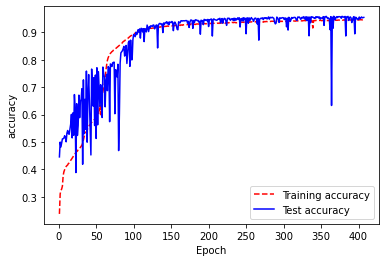

In [59]:
# history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)

# Get training and test loss histories
training_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()